<a href="https://colab.research.google.com/github/cesarlimca/Diplomado-TE-y-MD/blob/main/Modulo4_Proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 4**
**César Adrián Limones Carro**

## **Librerías para todo la práctica**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## **Ejercicio 1**

Estos datos se recopilaron (aproximadamente en 2012) a través de una prueba de personalidad interactiva en línea. Se informó a los participantes que sus respuestas se registrarían y se utilizarían para la investigación al comienzo de la prueba y se les pidió que confirmaran su consentimiento al final de la misma.

* Big5raw.csv -- Datos en crudo
* Codebook -- Descripción de los datos

**Conociendo la descripción de los datos, ¿qué nuevas conclusiones realizas del análisis descriptivo de datos anterior?**


In [9]:
# @title Carga de datos
import pandas as pd

# Cargar el CSV
df = pd.read_csv('Big5raw.csv')

# Mostrar las primeras filas para verificar los datos
#df.head()
#df = pd.read_excel('ISO_CC.xlsx')

# Mostrar las primeras filas para verificar los datos
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53.0,1.0,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46.0,1.0,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14.0,2.0,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19.0,2.0,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25.0,2.0,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [10]:
# @title Analisis descriptivo de todas las columnas numéricas
df.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,1.971800e+04,19718.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.476190,5.076961e+04,1.365098,1.623662,1.131498,1.953192,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133323,4.004767
std,21.701304,7.121452e+06,0.488788,0.874235,0.439459,1.510248,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.983289,0.983729
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,3000.000000,1.000000e+09,2.000000,99.000000,20.000000,20.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Si bien, la función describe muestra un análisis de variables continuas. Este primer análisis nos da información sobre:

* **Media**: qué tan cerca están las respuestas de un valor en particular (como el nivel de acuerdo).
* **Desviación estándar**: si las respuestas están dispersas o concentradas.
* **Valores mínimos y máximos**: podremos ver si se ha utilizado todo el rango (0-5) o si hay valores extremos.

De esta forma podemos darnos una idea de los valores atípicos que podemos encontrar.

In [11]:
for colum in df.columns:
  print(colum,"------->" , df[colum].unique())

race -------> [   3   13    1   11    5    4    8    6    9    0   10    7   12    2
 3000]
age -------> [5.30000000e+01 4.60000000e+01 1.40000000e+01 1.90000000e+01
 2.50000000e+01 3.10000000e+01 2.00000000e+01 2.30000000e+01
 3.90000000e+01 1.80000000e+01 1.70000000e+01 1.50000000e+01
 2.20000000e+01 2.10000000e+01 2.80000000e+01 2.60000000e+01
 2.90000000e+01 5.20000000e+01 4.80000000e+01 3.70000000e+01
 4.20000000e+01 2.70000000e+01 6.00000000e+01 2.40000000e+01
 4.70000000e+01 3.50000000e+01 3.40000000e+01 3.60000000e+01
 5.40000000e+01 4.50000000e+01 3.20000000e+01 4.90000000e+01
 1.30000000e+01 3.30000000e+01 1.60000000e+01 3.00000000e+01
 5.90000000e+01 4.10000000e+01 4.40000000e+01 4.30000000e+01
 3.80000000e+01 1.99700000e+03 4.00000000e+01 5.50000000e+01
 5.80000000e+01 5.10000000e+01 5.70000000e+01 1.99500000e+03
 5.60000000e+01 6.80000000e+01 7.00000000e+01 5.00000000e+01
 7.60000000e+01 6.30000000e+01 6.50000000e+01 1.99400000e+03
 6.20000000e+01 6.10000000e+01 6.70000000

**Observaciones preliminares**

Recordando que el objetivo es entender la naturaleza de los datos y compararlos con los datos brindados; se puede ver que los datos están sucios:
* Al pedir los valor únicos de cada campo, se puede notar que existen *NaN* (valor vacíos) en varios campos.
* Con el análsisi descriptivo hecho anteriormente se puede ver que no hay consistencia en la forma de los datos que se tiene la raza, edad, genero, mano y provinencia (source).
* Además, con la petición de valores únicos, se confirma que existe valores no coherentes algunos datos en raza, edad, genero, mano y provinencia (source).

### Detección de valores faltantes

Ya que el valor 0 en varias columnas representa la falta de información, podemos analizar qué columnas tienen más valores faltantes.

In [12]:
# Identificar proporción de valores '0' por columna
(df == 0).mean() * 1000

,0
race,7.759014
age,0.000000
engnat,3.549876
gender,1.217100
hand,5.071251
source,0.000000
country,0.000000
E1,0.050713
E2,0.050713
E3,0.050713


Se puede apreciar que los campos de **raza, angloparlante nativo, género y mano predominante** son los que tienen más ceros, por lo tanto, los que menos infomración aportan.
Esto podría cesgar el análisis.

### Distribución de Valores

Para entender la distribución de los valores de las preguntas (1-5) en lugar de la media, podemos contar las ocurrencias de cada valor.

In [13]:
# Contar los valores de 1 a 5 en las columnas E1 a O10
df.iloc[:, 7:].apply(pd.Series.value_counts)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,2,1
1,4679,4239,1617,2045,1858,5199,4628,1708,3444,1608,...,891,7100,421,7677,332,10470,286,2302,403,309
2,4483,4766,3263,4137,3234,6384,4224,3665,3937,3085,...,2036,6088,1106,5757,1045,5338,902,3625,1063,1200
3,5497,4671,4685,5501,4120,3707,3580,4539,3760,3650,...,4786,3832,3053,4103,4979,2102,3311,4921,2766,4030
4,3591,3575,5588,4842,5536,2865,3706,5104,4466,4904,...,6534,1873,6119,1401,7797,1101,7803,5406,6747,6724
5,1468,2467,4565,3193,4970,1563,3580,4702,4110,6471,...,5471,825,9019,780,5565,707,7416,3464,8738,7455


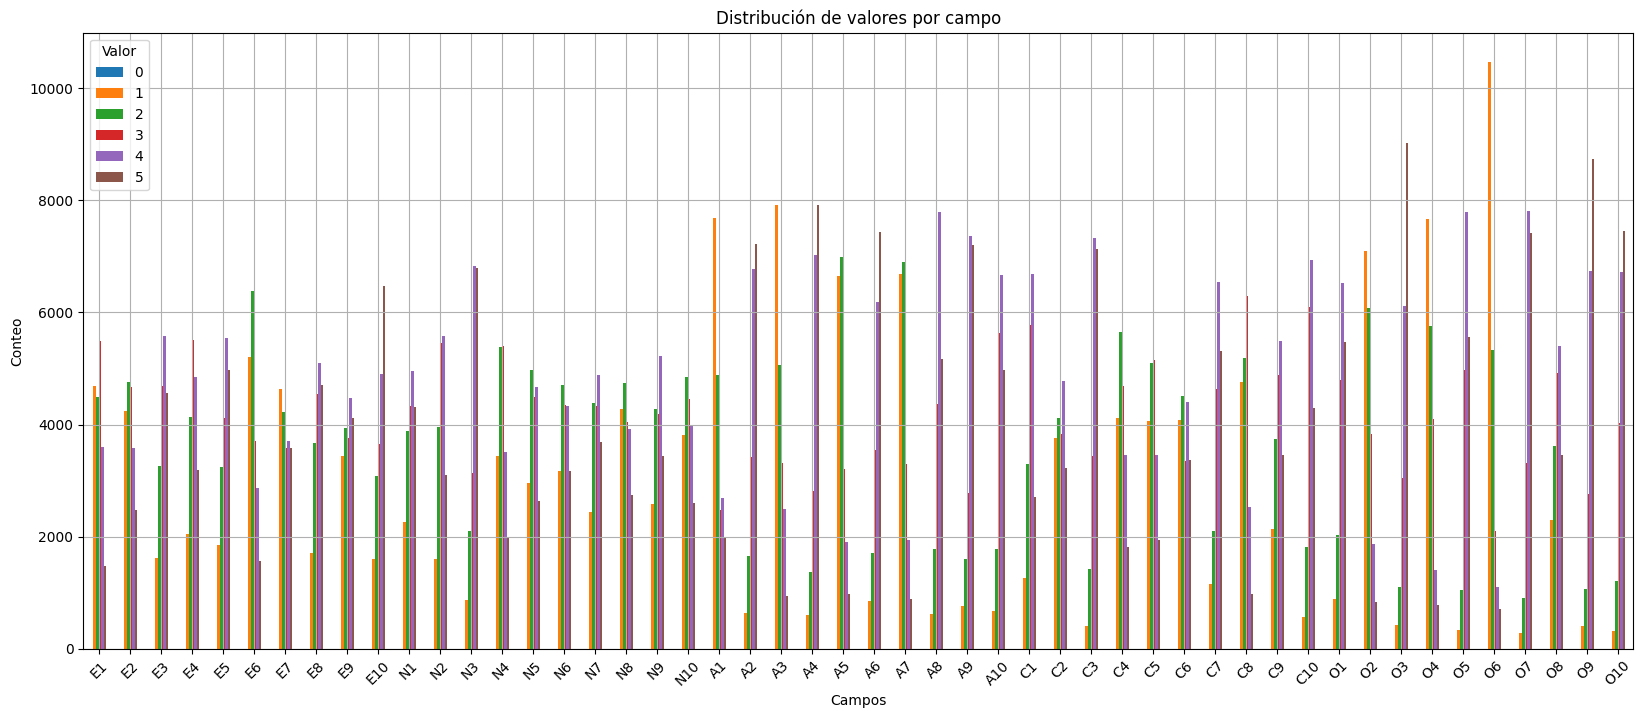

In [14]:
# @title Para graficar los conteos anteriores
# Transponer el DataFrame para que los campos sean las filas y los valores las columnas
df_transposed = df.iloc[:, 7:].apply(pd.Series.value_counts).T

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20, 8))

# Crear las barras
df_transposed.plot(kind='bar', ax=ax)

# Personalizar el gráfico
plt.xlabel('Campos')
plt.ylabel('Conteo')
plt.title('Distribución de valores por campo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.legend(title='Valor')
plt.grid()
# Mostrar el gráfico
plt.show()

Esta tabla y gráfica muestran cuántas veces aparece cada valor (del 1 al 5) en cada columna. Las columnas con una concentración de respuestas en ciertos valores pueden reflejar tendencias claras de acuerdo o desacuerdo entre los participantes.

### **Conclusiones preleminares para la encuesta**

* Al observar los valores de las columnas de la encuesta (E1 a O10), se puede notar si los encuestados tienden más al acuerdo o al desacuerdo en determinadas afirmaciones.

* Si se observa que algunas columnas tienen un alto porcentaje de valores faltantes (0), podrías considerar llenar manualmente estos valores o excluir estas columnas del análisis.

* **Tendencias demográficas:** Las columnas como race, gender, age, y country también podrían revelar patrones interesantes al combinar con las respuestas de la encuesta.

## **Ejercicio 2**

Detallar el proceso de limpieza de datos
* a) Eliminar todos los casos con valores faltantes (0) en los atributos.
* b) Eliminar casos con edades de más de 66
* c) Eliminar casos con códigos de países inválidos (ISO country code)
* d) Eliminar cualquier caso con valores faltantes en las variables demográficas
* e) Identificar el top 5 de variables de personalidad que consideres más representativas

### **a) Eliminar todos los casos con valores faltantes (0) en los atributos.**

In [15]:
# Antes de la limpieza
df.shape

(19719, 57)

In [16]:
df_limpio = df[(df.iloc[:, :] != 0).all(axis=1)]

# Verificar cuántos casos quedan después de esta limpieza
df_limpio.shape

(19381, 57)

### **b) Eliminar casos con edades de más de 66**

In [17]:
# Filtrar casos donde la edad es menor o igual a 66
df_limpio = df_limpio[df_limpio['age'] <= 66]

# Verificar el número de casos restantes
df_limpio.shape

(19199, 57)

### **c) Eliminar casos con códigos de países inválidos (ISO country code)**


Para eliminar códigos de países inválidos, utilizamos los estándares ISO de país. Se descargó una tabla de excel de la página oficial, para tener esos estándares.

In [18]:
# @title Para obtener la lista de todos los posibles codigos ISO

# Suponiendo que has leído tu tabla en un DataFrame llamado 'df'
# Puedes usar pd.read_excel('tu_archivo.xlsx') o pd.read_csv('tu_archivo.csv')
iso = pd.read_excel("ISO_CC.xlsx")

# Aplanar el DataFrame en una serie unidimensional
lista_codigos = iso.values.flatten().tolist()

# Mostrar los primeros 10 elementos de la lista
print(lista_codigos)
print(len(lista_codigos))

['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM', 'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT', 'DU', 'DV', 'DW', 'DX', 'DY', 'DZ', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'EO', 'EP', 'EQ', 'ER', 'ES', 'ET', 'EU', 'EV', 'EW', 'EX', 'EY', 'EZ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FM', 'FN', 'FO', 'FP', 'FQ', 'FR', 'FS', 'FT', 'FU', 'FV', 'FW', 'FX', 'FY', 'FZ', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'GK

In [19]:
# Filtrar casos donde el código del país es válido
df_limpio = df_limpio[df_limpio['country'].isin(lista_codigos)]

# Verificar el número de casos restantes
df_limpio.shape

(18822, 57)

### **d) Eliminar cualquier caso con valores faltantes en las variables demográficas.**

Dado que ya se eliminaron todos los "0". Podemos continuar nuestro análisis eliminando *NaN*.

In [20]:
df_limpio = df_limpio.dropna()

# Verificar el número de casos restantes
df_limpio.shape

(18809, 57)

### **e) Identificar el top 5 de variables de personalidad que consideres más representativas**

Por simplicidad, utilizamos la desviación estándar para identificar las columnas con mayor variabilidad.

In [21]:
# Calcular la desviación estándar de las columnas de atributos (E1 a O10)
std_caracteristicas = df_limpio.iloc[:, 7:].std().sort_values(ascending=False)

# Identificar las 5 variables con mayor desviación estándar (más representativas)
top_5_caracteristicas = std_caracteristicas.head(5)

# Mostrar las 5 variables de personalidad más representativas
top_5_caracteristicas

,0
E7,1.431143
C6,1.398246
E9,1.396413
A1,1.368060
C2,1.365964


Las variables **E7, C6, E9, A1 y C2**, son las 5 variables con mayor desviación estándar pues son aquellas en las que las respuestas de los participantes presentan más variabilidad, lo que puede indicar que son más representativas de las diferencias individuales.

También se pueden tomar las variables con menor desviación estandar. Solamente cambia el enfoque del análisis.


In [22]:
# Calcular la desviación estándar de las columnas de atributos (E1 a O10)
std_caracteristicas_menores = df_limpio.iloc[:, 7:].std().sort_values(ascending=True)

# Identificar las 5 variables con mayor desviación estándar (más representativas)
top_5_caracteristicas_menores = std_caracteristicas_menores.head(5)

# Mostrar las 5 variables de personalidad más representativas
top_5_caracteristicas_menores

,0
O7,0.920420
O5,0.941024
O9,0.981699
O10,0.983657
C3,1.000883


En este caso, las variables serían: **O7,O5, O9, O10 y C3**. Esto significa que estas variables, con menor desviación estandar, cuentan con menos variabilidad.

## **Ejercicio 3.**

**Indicar cuántos registros se eliminaron en cada caso. Y el total de registros finales.**

Los registros iniciales fueron: **19719**

Para cada uno de los procesos:
* a) Eliminar todos los casos con valores faltantes (0) en los atributos:
** Eliminados: **338**
** Restantes: **19381**

* b) Eliminar casos con edades de más de 66:
** Eliminados: **182**
** Restantes: **19199**

* c) Eliminar casos con códigos de países inválidos (ISO country code):
** Eliminados: **377**
** Restantes: **18822**

* d) Eliminar cualquier caso con valores faltantes en las variables demográficas:
** Eliminados: **13**
** Restantes: **18809**

**Por lo tanto: los registros que se trabajaran al final serán: *18809***

## **Ejercicio 4**

**Realizar el análisis PCA de los datos, concluye si se pueden reducir el número de variables en componentes. ¿Cuáles son las variables representativas para el análisis posterior?**

El Análisis de Componentes Principales (ACP) (**Principal Component Analysis**) es un método estadístico cuya utilidad radica en la reducción de la dimensionalidad de la base de datos (BDD) con la que estamos trabajando. Esta técnica se utiliza cuando queremos simplificar la base de datos, ya sea para elegir un menor número de predictores para pronosticar una variable objetivo, o para comprender una BDD de una forma más simple.


Antes de aplicar PCA, es necesario estandarizar los datos, ya que PCA se ve afectado por la escala de los valores.

Primero, seleccionamos solo las columnas que contienen los atributos de la encuesta (E1 a O10) para aplicar PCA, ya que estas son las variables de interés.

Tenemos que entender la naturaleza de los datos pues podemos estandarizar las variables categóricas, de: "race", "engnat", "gender", "hand", "source","country". Para "age"(edad) también se podría estandarizar, aunque el análisis se vería sesgado porque no el mínimo de edad es 13, no 1; si se considera esto último, también se puede estandarizar.

#### **PCA para atributos de E1 a O10**.

##### Estandarizando atributos de E1 a O10. Estandarización de 0 a 1.

In [23]:
# Crear un objeto MinMaxScaler
X = df_limpio.iloc[:, 7:]
scaler = MinMaxScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.75, 0.25, 1.  , ..., 0.25, 1.  , 1.  ],
       [0.25, 0.25, 0.5 , ..., 0.  , 0.5 , 0.25],
       [1.  , 0.  , 0.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [0.25, 1.  , 0.75, ..., 1.  , 1.  , 1.  ],
       [0.  , 0.75, 0.25, ..., 0.5 , 1.  , 1.  ],
       [0.25, 0.5 , 0.  , ..., 1.  , 1.  , 1.  ]])

In [24]:
# Convirtiendo el arrey transformado en un DataFrame para verlo
XS = pd.DataFrame(X_scaled, columns=X.columns)
XS

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0.75,0.25,1.00,0.25,1.00,0.00,0.75,0.50,1.00,0.00,...,0.75,0.00,0.5,0.00,1.00,0.00,0.75,0.25,1.0,1.00
1,0.25,0.25,0.50,0.50,0.50,0.50,0.00,1.00,0.00,1.00,...,0.50,0.50,0.5,0.50,0.25,0.50,0.50,0.00,0.5,0.25
2,1.00,0.00,0.00,0.75,1.00,0.00,0.00,1.00,1.00,0.00,...,0.75,1.00,1.0,0.00,1.00,0.00,1.00,1.00,1.0,1.00
3,0.25,1.00,0.25,0.75,0.50,0.75,0.50,0.75,0.75,1.00,...,0.75,0.50,1.0,0.25,0.75,0.25,1.00,0.25,1.0,1.00
4,0.50,0.00,0.50,0.50,0.50,0.00,0.50,0.00,0.50,1.00,...,0.50,0.00,0.0,0.00,0.50,0.00,0.50,0.00,1.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18804,0.00,0.75,0.50,1.00,0.75,0.50,0.00,0.25,0.00,1.00,...,0.00,0.50,1.0,0.50,0.75,0.00,0.75,0.25,1.0,0.50
18805,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.75,0.75,0.75,...,0.00,0.25,0.5,0.25,0.50,0.50,0.75,0.25,0.5,0.50
18806,0.25,1.00,0.75,1.00,1.00,1.00,0.00,0.25,0.00,1.00,...,1.00,0.50,0.0,0.50,0.75,0.00,0.00,1.00,1.0,1.00
18807,0.00,0.75,0.25,0.50,0.25,0.75,0.00,0.50,0.75,1.00,...,0.50,0.25,1.0,0.50,0.75,0.00,1.00,0.50,1.0,1.00


##### Realización del análisis PCA

Ahora realizamos el análisis PCA. Vamos a ajustar un PCA con tantas componentes como columnas (en este caso, 50) para poder determinar cuántas componentes son necesarias para explicar la mayoría de la varianza.

_NOTA:_ Al parecer, estre procedimiento se puede hacer con un arrey o directamente con el DataFrame. Pero el resultado siempre será un arrey.

In [40]:
# Crear un modelo PCA
pca = PCA(n_components=50)

# Ajustar el modelo a los datos estandarizados desde el arrey
pca.fit(X_scaled)

# Transformar los datos con PCA
X_pca = pca.transform(X_scaled)
X_pca

array([[ 2.24612468e+00, -7.18233162e-01,  1.57339857e-01, ...,
        -1.27732857e-03,  1.88429325e-01,  3.00782318e-02],
       [-4.69758163e-01, -9.06804372e-01,  5.64285040e-01, ...,
        -1.34712626e-01, -4.26991647e-02,  2.83178768e-02],
       [-1.35627260e-01,  7.87391561e-01,  1.19966700e+00, ...,
        -1.36049279e-02,  2.02816200e-01,  4.65169163e-03],
       ...,
       [-1.92488618e+00,  7.60668890e-01, -4.57935892e-01, ...,
        -1.19001863e-01,  7.41497381e-02,  2.40623869e-01],
       [-7.10220349e-01, -2.02359679e-01,  8.07022008e-01, ...,
         7.10925484e-02,  7.81882607e-03,  1.62476257e-01],
       [-5.94740258e-01, -1.66150713e-02,  1.69320664e-01, ...,
        -1.28489341e-01,  3.81810492e-02,  1.03782792e-01]])

In [39]:
# Crear un modelo PCA
pca = PCA(n_components=50)

# Ajustar el modelo a los datos estandarizados desde el DataFrame
pca.fit(XS)

# Transformar los datos con PCA
X_pca = pca.transform(XS)
X_pca

array([[ 2.24612468e+00, -7.18233162e-01,  1.57339857e-01, ...,
        -1.27732857e-03,  1.88429325e-01,  3.00782318e-02],
       [-4.69758163e-01, -9.06804372e-01,  5.64285040e-01, ...,
        -1.34712626e-01, -4.26991647e-02,  2.83178768e-02],
       [-1.35627260e-01,  7.87391561e-01,  1.19966700e+00, ...,
        -1.36049279e-02,  2.02816200e-01,  4.65169163e-03],
       ...,
       [-1.92488618e+00,  7.60668890e-01, -4.57935892e-01, ...,
        -1.19001863e-01,  7.41497381e-02,  2.40623869e-01],
       [-7.10220349e-01, -2.02359679e-01,  8.07022008e-01, ...,
         7.10925484e-02,  7.81882607e-03,  1.62476257e-01],
       [-5.94740258e-01, -1.66150713e-02,  1.69320664e-01, ...,
        -1.28489341e-01,  3.81810492e-02,  1.03782792e-01]])

#### Visualizar la varianza explicada por cada componente

Una vez ajustado el modelo, vamos a analizar cuánta varianza explica cada componente y calcular la varianza acumulada para identificar cuántas componentes necesitamos para capturar la mayoría de la información.

In [29]:
# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.17327871, 0.10145538, 0.07431548, 0.0593714 , 0.05668807,
       0.03136352, 0.02609745, 0.02158559, 0.02040687, 0.01948782,
       0.01834779, 0.01772535, 0.01669893, 0.01606747, 0.01522424,
       0.01432617, 0.01380413, 0.01370506, 0.01309688, 0.01276706,
       0.01246149, 0.01190712, 0.01164832, 0.01145488, 0.01122355,
       0.01108736, 0.01070098, 0.01035613, 0.01010594, 0.00990669,
       0.00966943, 0.00933743, 0.00923812, 0.00905653, 0.00896635,
       0.00891671, 0.00880132, 0.00858098, 0.00831751, 0.00813594,
       0.00802452, 0.007872  , 0.00758439, 0.00669016, 0.00654497,
       0.00638582, 0.0061135 , 0.00545589, 0.00519813, 0.00444449])

In [30]:
# Calcular la varianza acumulada. Se está sumando de forma acumlada cada una de las varianzas obtenidas previamente
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.17327871, 0.2747341 , 0.34904957, 0.40842097, 0.46510904,
       0.49647256, 0.52257001, 0.5441556 , 0.56456247, 0.58405029,
       0.60239807, 0.62012343, 0.63682236, 0.65288983, 0.66811407,
       0.68244024, 0.69624437, 0.70994942, 0.7230463 , 0.73581336,
       0.74827484, 0.76018196, 0.77183028, 0.78328516, 0.79450871,
       0.80559607, 0.81629705, 0.82665318, 0.83675912, 0.84666581,
       0.85633524, 0.86567267, 0.87491079, 0.88396732, 0.89293367,
       0.90185038, 0.9106517 , 0.91923268, 0.92755019, 0.93568613,
       0.94371065, 0.95158264, 0.95916704, 0.9658572 , 0.97240217,
       0.97878799, 0.98490149, 0.99035738, 0.99555551, 1.        ])

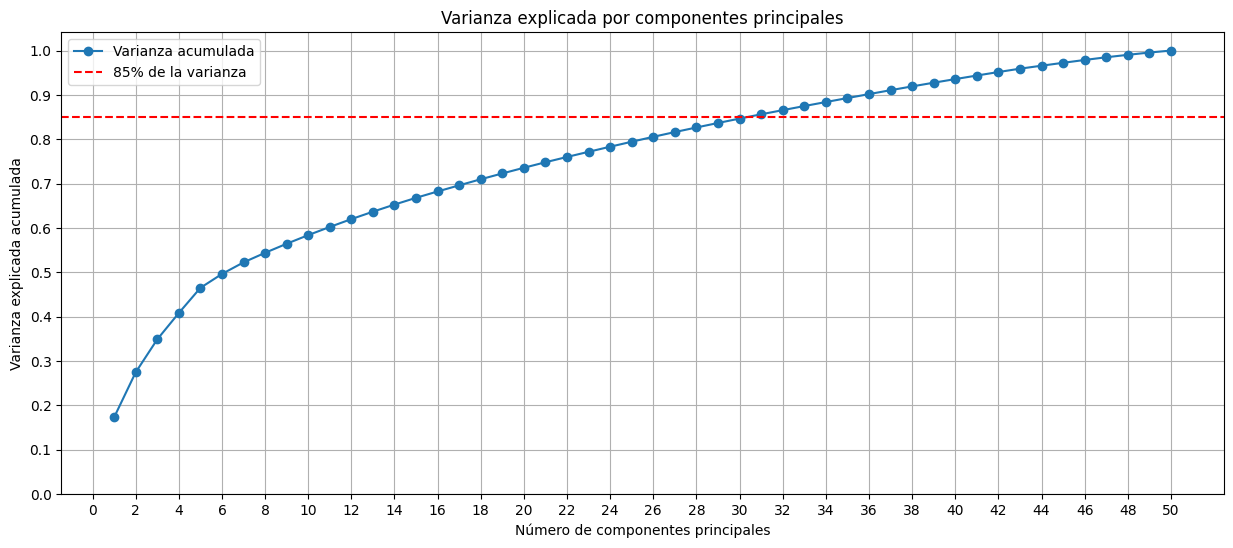

In [31]:
# Graficar la varianza explicada y acumulada
plt.figure(figsize=(15,6))
plt.plot(range(1, 51), cumulative_variance, marker='o', label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por componentes principales')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% de la varianza')
plt.xticks(np.arange(0, 51, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra la varianza acumulada explicada por las componentes principales. Si vemos que un número pequeño de componentes (como 5 o 10) ya explica un alto porcentaje de la varianza (por ejemplo, el 85%), podríamos concluir que es posible reducir el número de variables.

Para este caso, se puede decir que tomar 31 de las 50 variables como componentes principales, representan un alto número de la varianza y por lo tanto, se pueden reducir variables.

#### Seleccionando el número de componentes óptimo

Con base en la varianza explicada acumulada, decidimos el número de componentes que queremos conservar. En este caso, elegiremos un umbral de al menos el 85% de la varianza total.

In [32]:
# Seleccionar el número de componentes que explica al menos el 85% de la varianza
num_components = np.argmax(cumulative_variance >= 0.85) + 1

print(f"Número óptimo de componentes principales: {num_components}")

Número óptimo de componentes principales: 31


#### Identificando las variables más representativas

In [51]:
# Obtener los coeficientes de carga (loadings)
loadings = pca.components_[:num_components]
loadings

array([[ 0.18791801, -0.19577368,  0.25291502, ..., -0.00074656,
        -0.01850391,  0.07563636],
       [ 0.17847745, -0.22698362,  0.1070507 , ...,  0.05384449,
         0.03700523,  0.05638178],
       [-0.07795623,  0.05434154, -0.00147838, ..., -0.06511188,
         0.09461736, -0.02095835],
       ...,
       [-0.03442612,  0.11168633,  0.11884061, ..., -0.03248584,
        -0.15867166,  0.14868778],
       [ 0.08218743, -0.03345482,  0.16236184, ...,  0.02265002,
        -0.47689541, -0.13771085],
       [-0.17736155, -0.10403039,  0.09867757, ..., -0.01286998,
        -0.18878779,  0.06425968]])

* **pca.components_**: Este atributo contiene los vectores propios de la matriz de covarianza, que representan las direcciones de los componentes principales en el espacio de las variables originales.
* **[:num_components]**: Seleccionamos solo los primeros num_components vectores propios, correspondientes a los componentes principales que hemos decidido conservar.

In [52]:
# Convertir los loadings en un DataFrame para facilitar la interpretación
loadings_df = pd.DataFrame(loadings.T, index=X.columns, columns=[f'PC{i+1}' for i in range(num_components)])
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
E1,0.187918,0.178477,-0.077956,-0.117375,0.076433,0.113777,-0.018387,0.110990,-0.013984,-0.000648,...,-0.235423,0.260751,0.162955,-0.189642,0.109748,-0.070714,-0.271859,-0.034426,0.082187,-0.177362
E2,-0.195774,-0.226984,0.054342,0.096075,-0.052350,0.203588,-0.101225,0.090992,0.225639,-0.027002,...,0.059073,0.138525,0.080467,0.070557,-0.026729,-0.142539,0.047790,0.111686,-0.033455,-0.104030
E3,0.252915,0.107051,-0.001478,-0.100829,-0.028320,0.098066,0.039211,0.111827,-0.048436,-0.017657,...,0.059500,-0.262853,-0.073587,0.061752,-0.056322,0.029067,0.030405,0.118841,0.162362,0.098678
E4,-0.212434,-0.149064,0.085328,0.118901,-0.058575,0.174146,0.003923,0.093926,-0.034783,-0.037754,...,0.067884,-0.164804,-0.051095,0.091306,0.074625,0.095477,0.145058,0.073372,-0.018286,0.308708
E5,0.240922,0.194744,0.000456,-0.084390,0.053432,0.010900,0.075968,0.133426,-0.160415,-0.097326,...,0.133636,-0.154519,-0.058534,0.077708,-0.151306,0.005227,0.236923,0.023296,0.027137,0.064031
E6,-0.195791,-0.159750,0.027876,-0.047010,-0.080546,0.242764,-0.055710,0.105840,0.184465,-0.025295,...,-0.010230,0.125786,-0.081865,-0.069756,-0.065705,0.095099,0.058727,-0.040220,0.046309,-0.033745
E7,0.263866,0.217151,-0.050593,-0.128874,0.050479,0.058887,0.064295,0.279009,-0.150735,-0.105217,...,0.053665,0.068930,0.043371,-0.128619,0.118437,0.075413,0.082573,-0.128882,-0.238361,0.306356
E8,-0.144838,-0.167168,0.128216,0.113860,-0.097756,0.063830,0.163018,0.292139,-0.460451,-0.015406,...,0.161021,-0.068469,0.162360,0.475706,0.020041,0.125991,-0.286443,-0.158569,0.019531,-0.018328
E9,0.193474,0.197196,-0.129027,-0.093560,0.151053,0.130280,-0.152502,-0.202781,0.535139,0.040425,...,0.220480,-0.160385,0.016077,0.443073,0.020053,0.191977,-0.148339,-0.124033,-0.052427,0.033202
E10,-0.223667,-0.136506,0.093338,0.110178,-0.054440,0.168437,0.020478,-0.081314,0.066834,0.072346,...,-0.038539,-0.066973,0.092986,-0.083025,0.048552,0.038539,0.199629,-0.019205,-0.014606,0.177622


* **loadings.T**: Transponemos la matriz de loadings para que las filas correspondan a las variables originales y las columnas a los componentes principales.
* **index**=X.columns: Asignamos los nombres de las variables originales como índices del DataFrame.
* **columns**=[f'PC{i+1}' for i in range(num_components)]: Creamos nombres de columnas para los componentes principales en el formato PC1, PC2, etc.

In [135]:
# Función para obtener las tres variables más importantes por componente
def top_three_variables(loadings_df):
  top_three = {}
  for i in range(num_components):
    top_three[f'PC{i+1}'] = loadings_df.abs().nlargest(3, f'PC{i+1}').index.tolist()
  return top_three

In [96]:
# Aplicando la función y mostrando el resultado
dictionario = top_three_variables(loadings_df)
dictionario

{'PC1': ['E7', 'E3', 'E5'],
 'PC2': ['N8', 'N7', 'N6'],
 'PC3': ['C9', 'C6', 'C5'],
 'PC4': ['O8', 'O1', 'O2'],
 'PC5': ['O8', 'A5', 'A4'],
 'PC6': ['A1', 'N4', 'N2'],
 'PC7': ['C2', 'O6', 'O8'],
 'PC8': ['E8', 'E7', 'N8'],
 'PC9': ['E9', 'E8', 'O6'],
 'PC10': ['N4', 'A1', 'N3'],
 'PC11': ['A3', 'A1', 'O8'],
 'PC12': ['A3', 'C2', 'C8'],
 'PC13': ['A1', 'N4', 'A5'],
 'PC14': ['O4', 'O2', 'E6'],
 'PC15': ['N4', 'N5', 'N2'],
 'PC16': ['N5', 'C5', 'N4'],
 'PC17': ['C7', 'A3', 'N5'],
 'PC18': ['C4', 'C5', 'N10'],
 'PC19': ['C6', 'C2', 'C8'],
 'PC20': ['C9', 'C10', 'C3'],
 'PC21': ['E10', 'E1', 'C5'],
 'PC22': ['O9', 'C8', 'C1'],
 'PC23': ['C7', 'N2', 'E3'],
 'PC24': ['C9', 'C7', 'C5'],
 'PC25': ['E8', 'E9', 'O9'],
 'PC26': ['N6', 'C7', 'O9'],
 'PC27': ['C4', 'O5', 'C8'],
 'PC28': ['A10', 'C1', 'C8'],
 'PC29': ['C4', 'C3', 'N1'],
 'PC30': ['N10', 'O9', 'A10'],
 'PC31': ['A6', 'A8', 'A10']}

In [95]:
# Aplicando la función y creando el DataFrame
result = pd.DataFrame(top_three_variables(loadings_df))
result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,E7,N8,C9,O8,O8,A1,C2,E8,E9,N4,...,O9,C7,C9,E8,N6,C4,A10,C4,N10,A6
1,E3,N7,C6,O1,A5,N4,O6,E7,E8,A1,...,C8,N2,C7,E9,C7,O5,C1,C3,O9,A8
2,E5,N6,C5,O2,A4,N2,O8,N8,O6,N3,...,C1,E3,C5,O9,O9,C8,C8,N1,A10,A10


Ya tenemos las variables principales para cada _PCn_, al obtener una la lista con los primeros elementos de cada una, obtenemos las variables más importantes para este ejercicio.

##### Método 1 (usando el DataFrame que tenemos)

In [124]:
variables_importantes = set(result.iloc[0,:].tolist())
variables_importantes

{'A1',
 'A10',
 'A3',
 'A6',
 'C2',
 'C4',
 'C6',
 'C7',
 'C9',
 'E10',
 'E7',
 'E8',
 'E9',
 'N10',
 'N4',
 'N5',
 'N6',
 'N8',
 'O4',
 'O8',
 'O9'}

**Siendo las variables importantes: 'A1', 'A10', 'A3', 'A6', 'C2', 'C4', 'C6', 'C7', 'C9', 'E10', 'E7', 'E8', 'E9', 'N10', 'N4', 'N5', 'N6', 'N8', 'O4', 'O8', 'O9'**

##### Método 2

In [117]:
# Al quedarnos con los 31 componentes
n_components = 31
pca = PCA(n_components=n_components)
pca.fit(XS)

# Coeficientes de carga
loadings = pd.DataFrame(pca.components_, columns=XS.columns)

# Obtener las 2 variables con mayor carga absoluta en cada componente
top_variables = loadings.abs().idxmax(axis=1).tolist()

print(top_variables)

['E7', 'N8', 'C9', 'O8', 'O8', 'A1', 'C2', 'E8', 'E9', 'N4', 'A3', 'A3', 'A1', 'O4', 'N4', 'N5', 'C7', 'C4', 'C6', 'C9', 'E10', 'O9', 'C7', 'C9', 'E8', 'N6', 'C4', 'A10', 'C4', 'N10', 'A6']


In [121]:
unicos = set(top_variables)
unicos

{'A1',
 'A10',
 'A3',
 'A6',
 'C2',
 'C4',
 'C6',
 'C7',
 'C9',
 'E10',
 'E7',
 'E8',
 'E9',
 'N10',
 'N4',
 'N5',
 'N6',
 'N8',
 'O4',
 'O8',
 'O9'}

**Siendo las variables importantes: 'A1', 'A10', 'A3', 'A6', 'C2', 'C4', 'C6', 'C7', 'C9', 'E10', 'E7', 'E8', 'E9', 'N10', 'N4', 'N5', 'N6', 'N8', 'O4', 'O8', 'O9'**

##### **¿Cuáles son las variables representativas para el análisis posterior?**

Se puede decir que las variables más representativas son: **'A1', 'A10', 'A3', 'A6', 'C2', 'C4', 'C6', 'C7', 'C9', 'E10', 'E7', 'E8', 'E9', 'N10', 'N4', 'N5', 'N6', 'N8', 'O4', 'O8', 'O9'**

#### **PCA considerando atributos: "age" y de "E1" a "O10".**

##### Estandarizando quitando los atributos "race", "engnat", "gender", "hand", "source", "country". Estandarización de 0 a 1. Se considera la **edad**.

In [37]:
# Damos drop a la columna "country"
X2 = df_limpio.drop(columns=["race", "engnat", "gender", "hand", "source",'country'])

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
X2_scaled = scaler.fit_transform(X2)

In [38]:
X2S = pd.DataFrame(X2_scaled, columns=X2.columns)
X2S

,age,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0.754717,0.75,0.25,1.00,0.25,1.00,0.00,0.75,0.50,1.00,...,0.75,0.00,0.5,0.00,1.00,0.00,0.75,0.25,1.0,1.00
1,0.622642,0.25,0.25,0.50,0.50,0.50,0.50,0.00,1.00,0.00,...,0.50,0.50,0.5,0.50,0.25,0.50,0.50,0.00,0.5,0.25
2,0.018868,1.00,0.00,0.00,0.75,1.00,0.00,0.00,1.00,1.00,...,0.75,1.00,1.0,0.00,1.00,0.00,1.00,1.00,1.0,1.00
3,0.113208,0.25,1.00,0.25,0.75,0.50,0.75,0.50,0.75,0.75,...,0.75,0.50,1.0,0.25,0.75,0.25,1.00,0.25,1.0,1.00
4,0.226415,0.50,0.00,0.50,0.50,0.50,0.00,0.50,0.00,0.50,...,0.50,0.00,0.0,0.00,0.50,0.00,0.50,0.00,1.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18804,0.037736,0.00,0.75,0.50,1.00,0.75,0.50,0.00,0.25,0.00,...,0.00,0.50,1.0,0.50,0.75,0.00,0.75,0.25,1.0,0.50
18805,0.452830,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.75,0.75,...,0.00,0.25,0.5,0.25,0.50,0.50,0.75,0.25,0.5,0.50
18806,0.056604,0.25,1.00,0.75,1.00,1.00,1.00,0.00,0.25,0.00,...,1.00,0.50,0.0,0.50,0.75,0.00,0.00,1.00,1.0,1.00
18807,0.056604,0.00,0.75,0.25,0.50,0.25,0.75,0.00,0.50,0.75,...,0.50,0.25,1.0,0.50,0.75,0.00,1.00,0.50,1.0,1.00


##### Realización del análisis PCA

In [126]:
# Crear un modelo PCA
pca2 = PCA(n_components=51)

# Ajustar el modelo a los datos estandarizados desde el DataFrame
pca2.fit(X2S)

# Transformar los datos con PCA
X_pca2 = pca2.transform(X2S)

##### Obtener la varianza por componente

In [140]:
# Obtener la varianza explicada por cada componente
explained_variance2 = pca2.explained_variance_ratio_
explained_variance2

array([0.17211486, 0.10059679, 0.07378231, 0.05882188, 0.05614028,
       0.03115498, 0.02589974, 0.02139694, 0.02020967, 0.01930821,
       0.01862695, 0.01773655, 0.01673016, 0.01595353, 0.015094  ,
       0.01419674, 0.01367164, 0.01361773, 0.01318491, 0.0126716 ,
       0.01235032, 0.01198002, 0.01156347, 0.0113562 , 0.01111496,
       0.0109869 , 0.01062414, 0.01026544, 0.0100188 , 0.00981243,
       0.00962335, 0.00925651, 0.00918344, 0.00896992, 0.00893621,
       0.0088521 , 0.00871684, 0.00849806, 0.008255  , 0.00809404,
       0.00798326, 0.00782725, 0.00752776, 0.00715824, 0.00659115,
       0.00648075, 0.00616178, 0.00605101, 0.00533051, 0.00513763,
       0.00438301])

In [141]:
# Calcular la varianza acumulada. Se está sumando de forma acumlada cada una de las varianzas obtenidas previamente
cumulative_variance2 = np.cumsum(explained_variance2)
cumulative_variance2

array([0.17211486, 0.27271165, 0.34649396, 0.40531585, 0.46145613,
       0.49261111, 0.51851085, 0.53990779, 0.56011746, 0.57942567,
       0.59805262, 0.61578917, 0.63251933, 0.64847286, 0.66356685,
       0.67776359, 0.69143523, 0.70505296, 0.71823787, 0.73090947,
       0.74325979, 0.75523981, 0.76680328, 0.77815948, 0.78927444,
       0.80026134, 0.81088548, 0.82115092, 0.83116972, 0.84098215,
       0.8506055 , 0.85986201, 0.86904545, 0.87801537, 0.88695158,
       0.89580368, 0.90452052, 0.91301859, 0.92127359, 0.92936763,
       0.9373509 , 0.94517815, 0.95270592, 0.95986416, 0.96645531,
       0.97293606, 0.97909784, 0.98514885, 0.99047936, 0.99561699,
       1.        ])

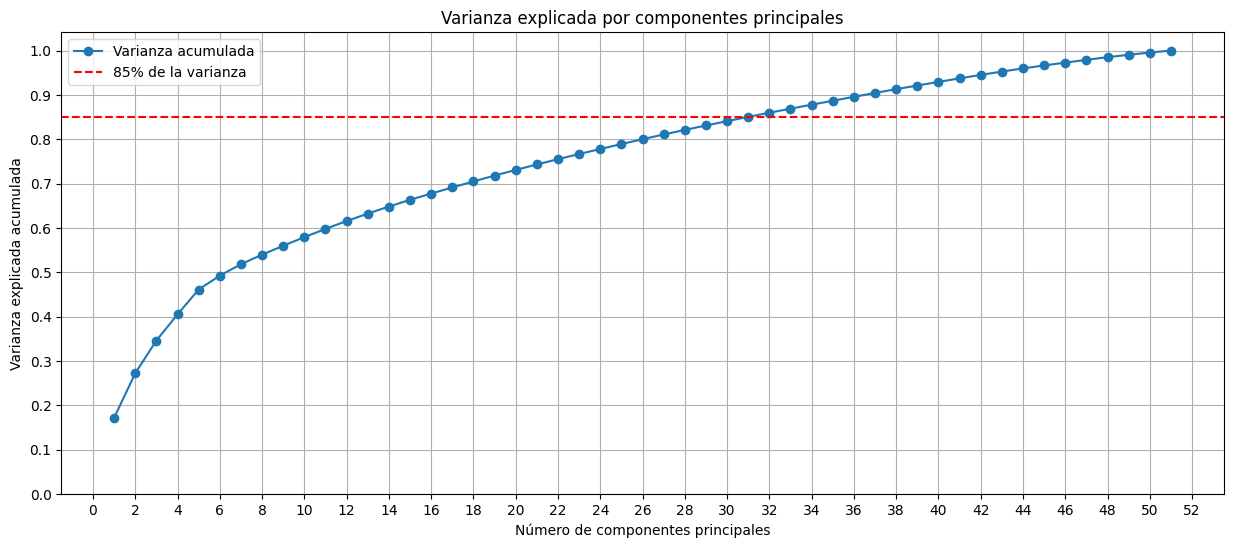

In [130]:
# Obtener la varianza explicada por cada componente
explained_variance2 = pca2.explained_variance_ratio_

# Calcular la varianza acumulada. Se está sumando de forma acumlada cada una de las varianzas obtenidas previamente
cumulative_variance2 = np.cumsum(explained_variance2)

# Graficar la varianza explicada y acumulada
plt.figure(figsize=(15,6))
plt.plot(range(1, 52), cumulative_variance2, marker='o', label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por componentes principales')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% de la varianza')
plt.xticks(np.arange(0, 53, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

Para este caso, también se tomarán 31 variables como componentes principales.

##### Seleccionando el número de componentes óptimo

In [144]:
num_components21 = np.argmax(cumulative_variance2 >= 0.85)
num_components21

30

In [145]:
# Seleccionar el número de componentes que explica al menos el 85% de la varianza
num_components2 = np.argmax(cumulative_variance2 >= 0.85) + 2

print(f"Número óptimo de componentes principales: {num_components2}")

Número óptimo de componentes principales: 32


##### Obteniendo variables representativas

In [146]:
# Obtener los coeficientes de carga (loadings)
loadings2 = pca2.components_[:num_components2]
# Convertir los loadings en un DataFrame para facilitar la interpretación
loadings_df2 = pd.DataFrame(loadings2.T, index=X2.columns, columns=[f'PC{i+1}' for i in range(num_components2)])

In [147]:
# Definiendo una nueva función
# Función para obtener las tres variables más importantes por componente
def top_three_variables2(loadings_df2):
  top_three = {}
  for i in range(num_components2):
    top_three[f'PC{i+1}'] = loadings_df2.abs().nlargest(3, f'PC{i+1}').index.tolist()
  return top_three

In [148]:
# Aplicando la función y mostrando el resultado
dictionario2 = top_three_variables2(loadings_df2)
dictionario2

{'PC1': ['E7', 'E3', 'E5'],
 'PC2': ['N8', 'N7', 'N6'],
 'PC3': ['C9', 'C6', 'C5'],
 'PC4': ['O8', 'O1', 'O2'],
 'PC5': ['O8', 'A5', 'A4'],
 'PC6': ['A1', 'N4', 'N2'],
 'PC7': ['C2', 'O6', 'O8'],
 'PC8': ['E8', 'E7', 'N5'],
 'PC9': ['E9', 'E8', 'O6'],
 'PC10': ['N4', 'A1', 'N3'],
 'PC11': ['A3', 'E10', 'A1'],
 'PC12': ['C2', 'N7', 'N8'],
 'PC13': ['A1', 'N4', 'A5'],
 'PC14': ['O4', 'O2', 'E6'],
 'PC15': ['N4', 'N5', 'N2'],
 'PC16': ['N5', 'C5', 'C8'],
 'PC17': ['C7', 'A3', 'N5'],
 'PC18': ['C4', 'A3', 'C5'],
 'PC19': ['C6', 'C2', 'C9'],
 'PC20': ['C9', 'C10', 'A6'],
 'PC21': ['E10', 'E1', 'C5'],
 'PC22': ['C1', 'C7', 'O9'],
 'PC23': ['N2', 'E1', 'C7'],
 'PC24': ['C9', 'C7', 'C5'],
 'PC25': ['E8', 'E9', 'O9'],
 'PC26': ['N6', 'C7', 'O9'],
 'PC27': ['C4', 'C8', 'O5'],
 'PC28': ['A10', 'C8', 'C1'],
 'PC29': ['C4', 'C3', 'N1'],
 'PC30': ['N10', 'O9', 'A10'],
 'PC31': ['A6', 'A10', 'A8'],
 'PC32': ['E4', 'A2', 'E7']}

In [151]:
# Aplicando la función y creando el DataFrame
result2 = pd.DataFrame(top_three_variables2(loadings_df2))
result2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,E7,N8,C9,O8,O8,A1,C2,E8,E9,N4,...,N2,C9,E8,N6,C4,A10,C4,N10,A6,E4
1,E3,N7,C6,O1,A5,N4,O6,E7,E8,A1,...,E1,C7,E9,C7,C8,C8,C3,O9,A10,A2
2,E5,N6,C5,O2,A4,N2,O8,N5,O6,N3,...,C7,C5,O9,O9,O5,C1,N1,A10,A8,E7


In [152]:
# Obteniendo las variables significativas
variables_importantes2 = set(result2.iloc[0,:].tolist())
variables_importantes2

{'A1',
 'A10',
 'A3',
 'A6',
 'C1',
 'C2',
 'C4',
 'C6',
 'C7',
 'C9',
 'E10',
 'E4',
 'E7',
 'E8',
 'E9',
 'N10',
 'N2',
 'N4',
 'N5',
 'N6',
 'N8',
 'O4',
 'O8'}

##### **Las variables significativas, considerando la edad, son: 'A1', 'A10', 'A3', 'A6', 'C1', 'C2', 'C4', 'C6', 'C7', 'C9', 'E10', 'E4', 'E7', 'E8', 'E9', 'N10', 'N2', 'N4', 'N5', 'N6', 'N8', 'O4', 'O8'**


Las variables significativas sin considerar la edad anterior son: 'A1', 'A10', 'A3', 'A6', 'C2', 'C4', 'C6', 'C7', 'C9', 'E10', 'E7', 'E8', 'E9', 'N10', 'N4', 'N5', 'N6', 'N8', 'O4', 'O8', 'O9'

Se puede notar que son practicamente las mismas, sólo se agregan: "C1","E4", "N2"; y se quita "O9".

Es decir, hay dos variables más significativas.

## **Ejercicio 5**

**Realiza el análisis de clustering para 2, 3, 4 y 5 clusteres, ¿qué clúster tiene más datos? ¿Cuántos clústeres recomiendas generar y por qué? Es decir, k=?**

Para realizar el análisis de clustering en tus datos, usaremos el algoritmo K-means. Este método divide los datos en diferentes grupos (clústeres) basados en la proximidad de los datos entre sí. Vamos a explorar los resultados para 2, 3, 4 y 5 clústeres, y finalmente recomendaremos el número óptimo de clústeres basado en la variación dentro de los grupos y el criterio de Elbow.

In [153]:
# Configurar seaborn para mejor visualización
sns.set()

#### Aplicar K-means para diferentes números de clústeres

Vamos a aplicar el algoritmo K-means para k=2, k=3, k=4 y k=5 clústeres usando los datos reducidos obtenidos en el análisis PCA (31 componentes principales).

In [156]:
# Aplicar K-means para k=2, 3, 4 y 5
clusters = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(XS)  # Usamos las 31 variables reducidas
    clusters[k] = kmeans.labels_

# Verificar las etiquetas (clústeres asignados) para cada valor de k
clusters

{2: array([0, 1, 1, ..., 1, 1, 1], dtype=int32),
 3: array([0, 1, 2, ..., 1, 1, 1], dtype=int32),
 4: array([0, 1, 3, ..., 2, 2, 2], dtype=int32),
 5: array([0, 3, 3, ..., 1, 3, 1], dtype=int32)}

#### Evaluar la cantidad de datos por cluster

Para cada valor de k, calculamos cuántos datos pertenecen a cada clúster.

In [159]:
# Contar la cantidad de datos en cada clúster para k=2, k=3, k=4 y k=5
for k in range(2, 6):
    print(f"\nDistribución para k={k}:")
    unique, counts = np.unique(clusters[k], return_counts=True)
    print(dict(zip(unique, counts)))


Distribución para k=2:
{0: 9410, 1: 9399}

Distribución para k=3:
{0: 6342, 1: 6905, 2: 5562}

Distribución para k=4:
{0: 4284, 1: 5014, 2: 4451, 3: 5060}

Distribución para k=5:
{0: 3975, 1: 3789, 2: 3987, 3: 3521, 4: 3537}


#### Decidir el número óptimo de clústeres (Criterio Elbow)

Usamos el método Elbow para determinar el número óptimo de clústeres. Este método grafica la inertia (la suma de las distancias cuadradas entre los puntos y el centroide más cercano) para diferentes valores de k y busca el "codo" en la curva.

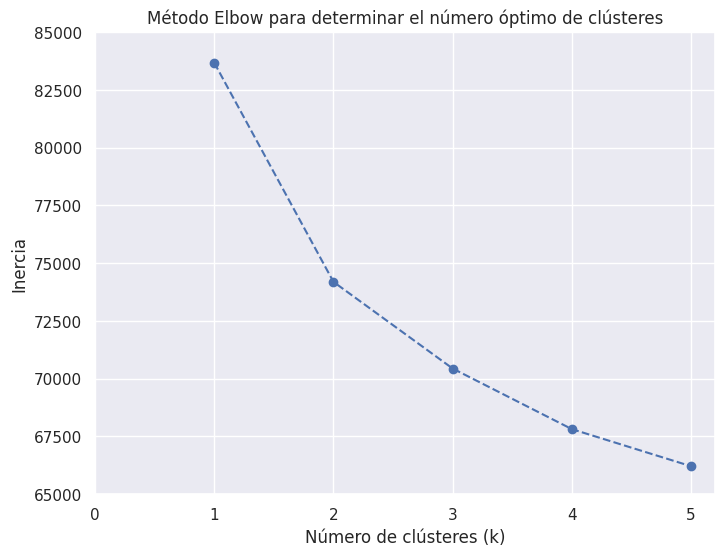

In [169]:
# Calcular la inercia (suma de distancias cuadradas) para diferentes valores de k
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(XS)
    inertia.append(kmeans.inertia_)

# Graficar el criterio Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), inertia, marker='o', linestyle='--')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método Elbow para determinar el número óptimo de clústeres')
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(65000, 87500, 2500))
plt.grid(True)
plt.show()

En el gráfico de Elbow, buscamos el punto donde la inercia comienza a disminuir lentamente, formando un "codo" en la curva. Este punto sugiere el número óptimo de clústeres, ya que después de este punto, añadir más clústeres no mejora significativamente la agrupación.

#### **Podemos concluir que con 3 clusters tendremos la mejor distribución de datos en cantidad. Podremos intentar 4 clusters, y también funcionaría bien.**